In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os

path = '/content/drive/MyDrive/data/programmers_ai/yujatea/comp_3/dataset/train/'

In [3]:
import pandas as pd

train = pd.read_csv(os.path.join(path, 'train_output.csv'))
train.head()

,filename,label
0,1,1 0.438281 0.529551 0.814063 0.704492
1,2,3 0.541016 0.524324 0.849219 0.672973
2,3,2 0.492500 0.517045 0.695000 0.725000
3,4,2 0.585156 0.525000 0.692187 0.785135
4,5,3 0.385547 0.645270 0.614844 0.698649\n3 0.559...


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  1204 non-null   int64 
 1   label     1204 non-null   object
dtypes: int64(1), object(1)
memory usage: 18.9+ KB


In [12]:
from tqdm import tqdm

labels = []

for row in tqdm(train.iterrows()):
  labels.append(row[1]['label'].split()[0])

1204it [00:00, 22740.52it/s]


In [13]:
train['kind'] = labels

In [14]:
train.head()

,filename,label,kind
0,1,1 0.438281 0.529551 0.814063 0.704492,1
1,2,3 0.541016 0.524324 0.849219 0.672973,3
2,3,2 0.492500 0.517045 0.695000 0.725000,2
3,4,2 0.585156 0.525000 0.692187 0.785135,2
4,5,3 0.385547 0.645270 0.614844 0.698649\n3 0.559...,3


In [15]:
train['kind'].value_counts()

3    307
1    300
0    299
2    298
Name: kind, dtype: int64

In [16]:
f_name_list = []
for row in tqdm(train.iterrows()):
  f_name = row[1]['filename']
  f_len = len(str(f_name))
  if f_len == 1:
    result = f'000{f_name}.jpg'
  elif f_len == 2:
    result = f'00{f_name}.jpg'
  elif f_len == 3:
    result = f'0{f_name}.jpg'
  elif f_len == 4:
    result = f'{f_name}.jpg'
  
  f_name_list.append(result)

1204it [00:00, 23388.35it/s]


In [17]:
train['filename'] = f_name_list

In [18]:
train.head()

,filename,label,kind
0,0001.jpg,1 0.438281 0.529551 0.814063 0.704492,1
1,0002.jpg,3 0.541016 0.524324 0.849219 0.672973,3
2,0003.jpg,2 0.492500 0.517045 0.695000 0.725000,2
3,0004.jpg,2 0.585156 0.525000 0.692187 0.785135,2
4,0005.jpg,3 0.385547 0.645270 0.614844 0.698649\n3 0.559...,3


In [19]:
from skimage.transform import resize
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [20]:
train['filename'][0]

'0001.jpg'

이미지의 해상도: (423, 640, 3)


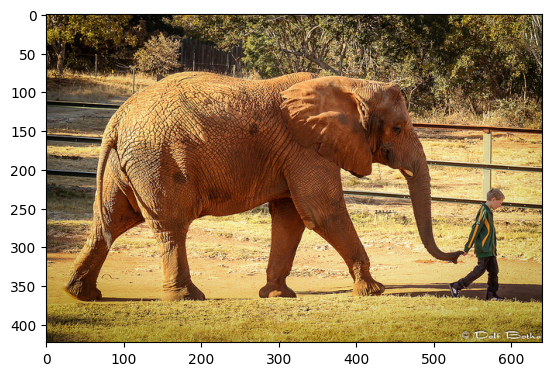

In [21]:
img = Image.open(os.path.join(path, train['filename'][0]))
img = np.asarray(img)
print('이미지의 해상도:', img.shape)

# 이미지 출력하기
plt.imshow(img)
plt.show()

In [24]:
train.loc[0]['filename']

'0001.jpg'

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  1204 non-null   object
 1   label     1204 non-null   object
 2   kind      1204 non-null   object
dtypes: object(3)
memory usage: 28.3+ KB


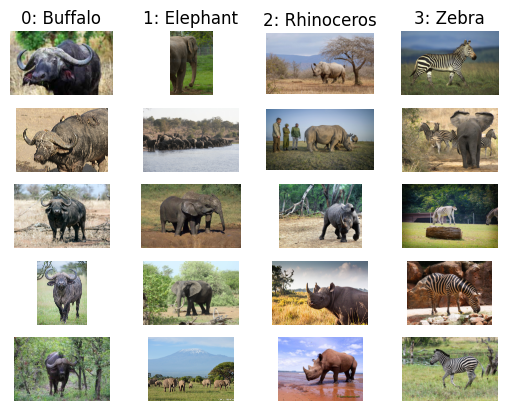

In [49]:
classes = ['0: Buffalo', '1: Elephant', '2: Rhinoceros','3: Zebra']
# 각 클래스마다 특정 개수의 이미지를 출력합니다.
samples_per_class = 5


# 데이터 시각화 함수 구현
def visualize_data(df, classes, samples_per_class):
    num_classes = len(classes)
    for y, cls in enumerate(classes): # 각 클래스를 (클래스, 클래스명) 형식으로 순회
        idxs = np.flatnonzero(df['kind'] == str(y)) # 해당 클래스를 갖는(True 값을 갖는) 데이터 인덱스 계산
        idxs = np.random.choice(idxs, samples_per_class, replace=False) # 특정 개수만큼 무작위로 선택
        for i, idx in enumerate(idxs): # 하나씩 이미지를 확인하며
            plt_idx = i * num_classes + y + 1 # 이미지를 출력할 위치: 각 열(column)에 차례대로 출력하도록 설정
            plt.subplot(samples_per_class, num_classes, plt_idx)
            img = Image.open(os.path.join(path, df.loc[idx]['filename']))
            img = np.asarray(img)
            plt.imshow(img)
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

visualize_data(train, classes, samples_per_class)

In [41]:
def modify_fname(df):
  f_name_list = []
  for row in tqdm(df.iterrows()):
    f_name = row[1]['filename']
    f_len = len(str(f_name))
    if f_len == 1:
      result = f'000{f_name}.jpg'
    elif f_len == 2:
      result = f'00{f_name}.jpg'
    elif f_len == 3:
      result = f'0{f_name}.jpg'
    elif f_len == 4:
      result = f'{f_name}.jpg'
    
    f_name_list.append(result)
  
  df['filename'] = f_name_list

In [34]:
def select_label(df):
  labels = []
  for row in df.iterrows():
    data = row[1]['label'].split()[0]
    labels.append(data)
  df['kind'] = labels

In [36]:
t_path = '/content/drive/MyDrive/data/programmers_ai/yujatea/comp_3/dataset/test/'
test = pd.read_csv(os.path.join(t_path, 'test_output.csv'))

In [37]:
test.head()

,filename,label
0,1205,1 0.662500 0.482394 0.606250 0.607981\n1 0.207...
1,1206,3 0.703906 0.629977 0.367188 0.707260\n3 0.331...
2,1207,2 0.511250 0.540338 0.832500 0.615385
3,1208,0 0.551562 0.545946 0.484375 0.494595
4,1209,3 0.429000 0.564000 0.702000 0.749333\n3 0.402...


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  300 non-null    int64 
 1   label     300 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.8+ KB


In [39]:
select_label(test)

In [42]:
modify_fname(test)

300it [00:00, 15426.47it/s]


In [43]:
test.head()

,filename,label,kind
0,1205.jpg,1 0.662500 0.482394 0.606250 0.607981\n1 0.207...,1
1,1206.jpg,3 0.703906 0.629977 0.367188 0.707260\n3 0.331...,3
2,1207.jpg,2 0.511250 0.540338 0.832500 0.615385,2
3,1208.jpg,0 0.551562 0.545946 0.484375 0.494595,0
4,1209.jpg,3 0.429000 0.564000 0.702000 0.749333\n3 0.402...,3


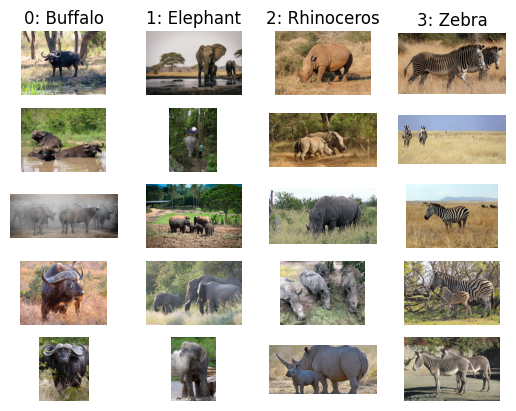

In [50]:
classes = ['0: Buffalo', '1: Elephant', '2: Rhinoceros','3: Zebra']
# 각 클래스마다 특정 개수의 이미지를 출력합니다.
samples_per_class = 5


# 데이터 시각화 함수 구현
def visualize_test_data(df, classes, samples_per_class):
    num_classes = len(classes)
    for y, cls in enumerate(classes): # 각 클래스를 (클래스, 클래스명) 형식으로 순회
        idxs = np.flatnonzero(df['kind'] == str(y)) # 해당 클래스를 갖는(True 값을 갖는) 데이터 인덱스 계산
        idxs = np.random.choice(idxs, samples_per_class, replace=False) # 특정 개수만큼 무작위로 선택
        for i, idx in enumerate(idxs): # 하나씩 이미지를 확인하며
            plt_idx = i * num_classes + y + 1 # 이미지를 출력할 위치: 각 열(column)에 차례대로 출력하도록 설정
            plt.subplot(samples_per_class, num_classes, plt_idx)
            img = Image.open(os.path.join(t_path, df.loc[idx]['filename']))
            img = np.asarray(img)
            plt.imshow(img)
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

visualize_test_data(test, classes, samples_per_class)

In [52]:
test['kind'].value_counts()

0    77
1    76
2    74
3    73
Name: kind, dtype: int64